# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.056981e+01     5.750387e+00
 * time: 0.003554105758666992
     1     2.791819e+01     4.480995e+00
 * time: 0.010679960250854492
     2     1.945431e+01     4.046190e+00
 * time: 0.028608083724975586
     3     1.317931e+01     1.048038e+00
 * time: 0.048805952072143555
     4     1.169747e+01     1.825444e+00
 * time: 0.06154608726501465
     5     1.102102e+01     1.568027e+00
 * time: 0.07369494438171387
     6     1.030638e+01     1.713667e+00
 * time: 0.08639812469482422
     7     9.958854e+00     1.626395e+00
 * time: 0.0990750789642334
     8     9.397960e+00     1.205328e+00
 * time: 0.16124796867370605
     9     9.081011e+00     9.762744e-01
 * time: 0.17408394813537598
    10     8.882726e+00     6.047890e-01
 * time: 0.1873469352722168
    11     8.866997e+00     9.969121e-01
 * time: 0.19669294357299805
    12     8.818669e+00     7.863228e-01
 * time: 0.21030211448669434
    13     8.770960e+00     6.740038e-01
 * tim

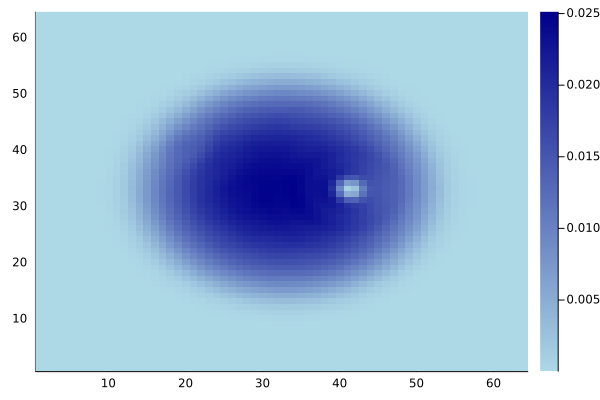

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)